In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import statistics
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
data=pd.read_csv(r'C:\Users\guzel\Desktop\airbnb_NYC\listings.csv')

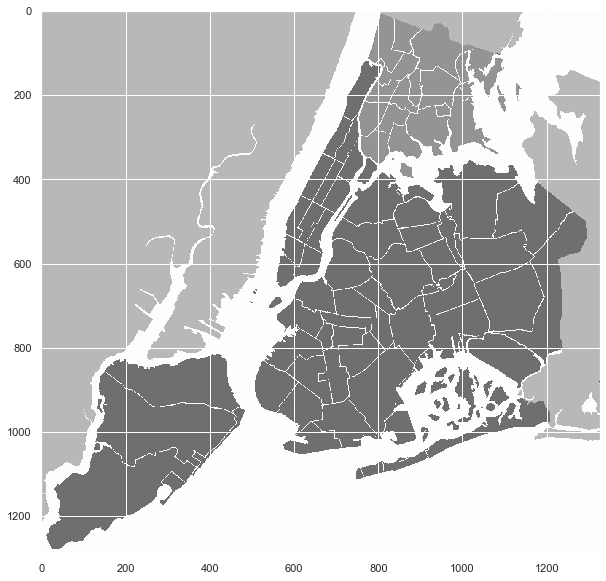

In [3]:
img=mpimg.imread('New_York_City_.png',0) 
plt.imshow(img)

In [4]:
data

id                                               name    host_id  \
0          2595                              Skylit Midtown Castle       2845   
1          3831                    Cozy Entire Floor of Brownstone       4869   
2          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
3          5121                                    BlissArtsSpace!       7356   
4          5178                   Large Furnished Room Near B'way        8967   
...         ...                                                ...        ...   
50594  40570168    Happy, accommodating,confortable & súper CLEAN!  314364722   
50595  40570350                      Cozy Modern Cottage Apartment   61835657   
50596  40570935  Súper clean, super confortable,súper ACCOMMODA...  314364722   
50597  40572303                                 Captivating Room C  219544415   
50598  40584021    Bright studio apartment with a lot of amenities   27943798   

             host_name neighbourhood_group       neighbourhood  latitude  \
0             Jennifer           Manhattan             Midtown  40.75362   
1          LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
2                Chris           Manhattan         Murray Hill  40.74767   
3                Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
4             Shunichi           Manhattan      Hell's Kitchen  40.76489   
...                ...                 ...                 ...       ...   
50594            Archi               Bronx             Fordham  40.86173   
50595             Hugo              Queens    Ditmars Steinway  40.77645   
50596            Archi               Bronx             Fordham  40.86239   
50597  Joel And Julian            Brooklyn  Bedford-Stuyvesant  40.69313   
50598       Narendiran            Brooklyn        Williamsburg  40.70414   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.98377  Entire home/apt    225              10                 48   
1      -73.95976  Entire home/apt     89               1                295   
2      -73.97500  Entire home/apt    200               3                 78   
3      -73.95596     Private room     60              29                 49   
4      -73.98493     Private room     79               2                454   
...          ...              ...    ...             ...                ...   
50594  -73.89413  Entire home/apt    200               1                  0   
50595  -73.90754  Entire home/apt    150               3                  0   
50596  -73.89468  Entire home/apt    225               1                  0   
50597  -73.95031     Private room     70               2                  0   
50598  -73.94932  Entire home/apt    100               9                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2019-11-04               0.39                               1   
1      2019-11-22               4.67                               1   
2      2019-10-13               0.60                               1   
3      2017-10-05               0.38                               1   
4      2019-11-21               3.52                               1   
...           ...                ...                             ...   
50594         NaN                NaN                               2   
50595         NaN                NaN                               1   
50596         NaN                NaN                               2   
50597         NaN                NaN                               3   
50598         NaN                NaN                               1   

       availability_365  
0                     1  
1                     1  
2                    19  
3                   365  
4                   242  
...                 ...  
50594               355  
50595                37  
50596               167  
50597               354  
50598                18  



In [5]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
data.drop(['host_name'], axis=1, inplace=True)

In [7]:
data.isnull().sum()

id                                    0
name                                 17
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10220
reviews_per_month                 10220
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
data.fillna({'name':0}, inplace=True)
data.fillna({'last_review':0}, inplace=True)
data.fillna({'reviews_per_month':0}, inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Detect Outliers and Ignore Them

In [9]:
print(len(data.price))
print(data.price.median())
print(data.price.mean())
print(len(data.price[data.price > data.price.std()]))
print(data.price.std())

50599
105.0
158.17178205102869
2908
348.08956197119085


# Attempts for figure out the anomalies:

In [10]:
min_p = min(data.price)
max_p = max(data.price)
print('Min price per night: {}, Max price per night: {} '.format(min_p,max_p))

Min price per night: 0, Max price per night: 10000 


In [11]:
print(data.shape[0])
print(len(data.loc[data.price > 0, 'price']))

50599
50583


### I am going to remove these 16 listings whose price is 0

In [12]:
# Clean all 0 prices and check the new min price.

data = data[data.price != 0]
print(data.price.min())

10


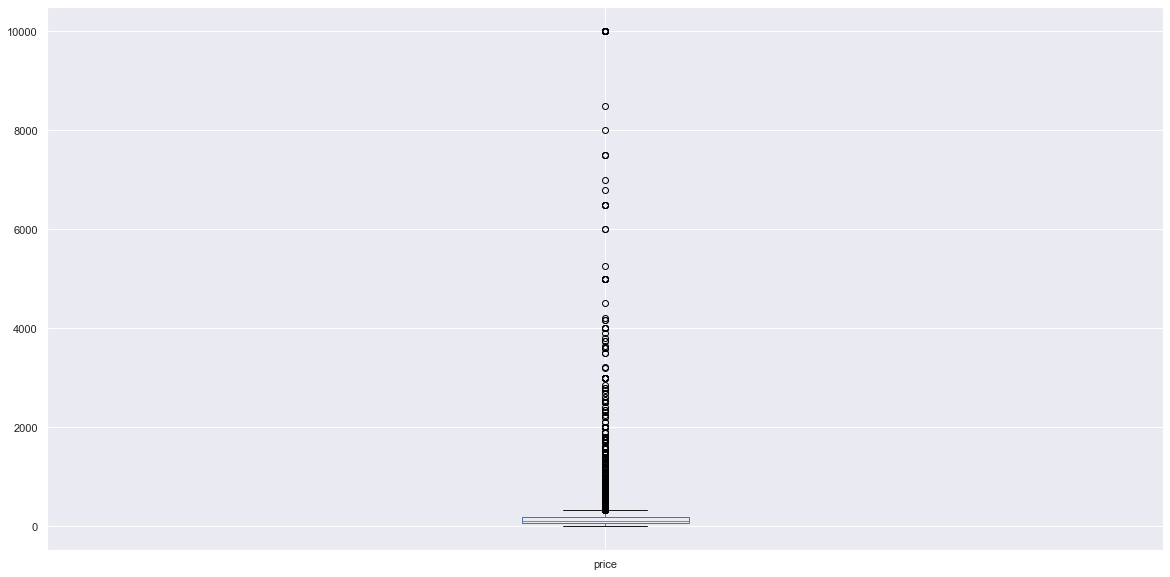

In [13]:
data.price.plot(kind='box')
plt.show()

# Even if we got rid of 0 prices, the boxplot above is still squished. Thus I created 2nd boxplot below by limiting the price range to get rid of the extreme outliers. 

In [14]:
desc = data.price.describe()
print(desc)
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data.price[data.price < lower_bound]
print("Outliers: ",data.price[(data.price < lower_bound) | (data.price > upper_bound)].values)

count    50583.000000
mean       158.221814
std        348.133242
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
Anything outside this range is an outlier: ( -90.0 , 334.0 )
Outliers:  [ 375 2000  500 ... 1000 1000  500]


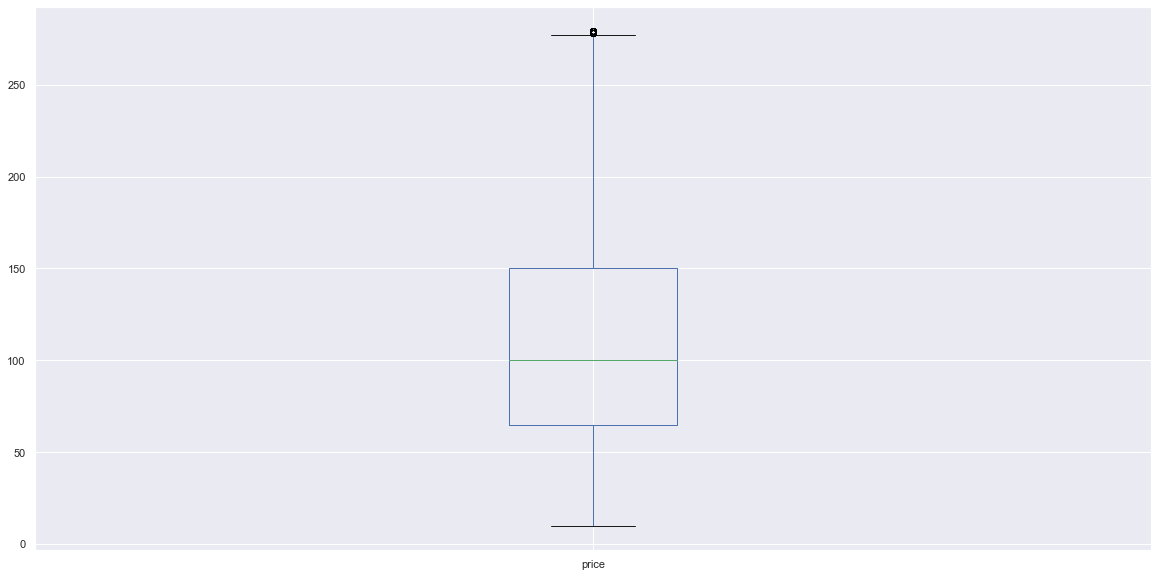

In [15]:
data.price[data.price< 280].plot(kind='box')
plt.show()

In [16]:
# I have created new Series by filtering price column from outleirs in sake of the codes below.
price_new = data.price[data.price < 280]

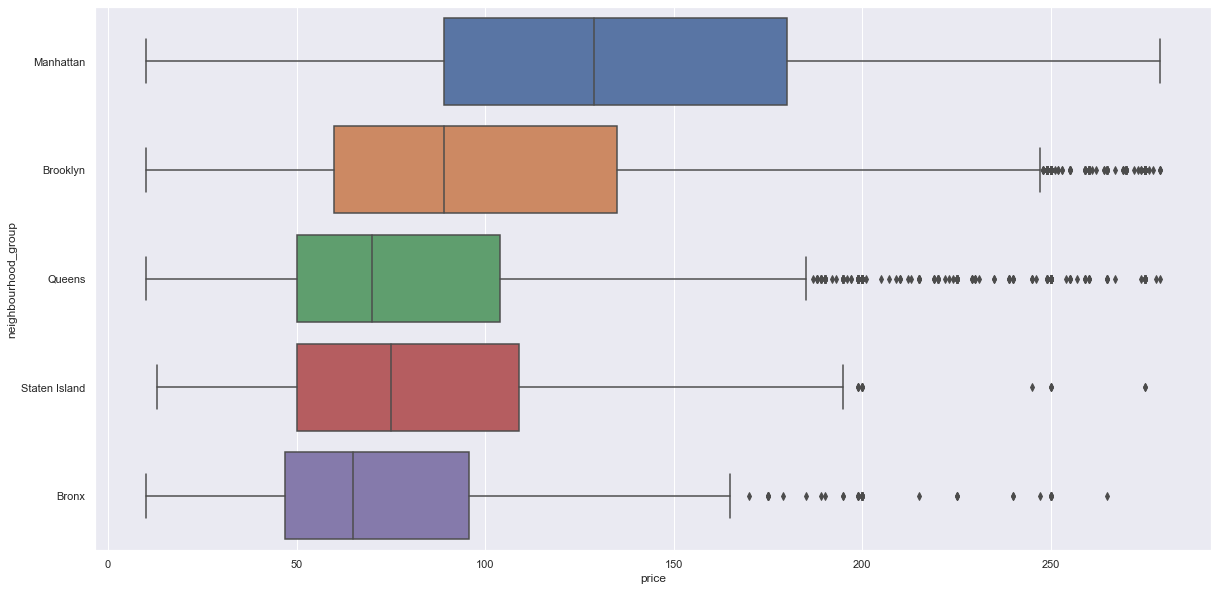

In [17]:
sns.boxplot(x=price_new, y=data.neighbourhood_group)

In [18]:
def find_anomalies():
    # Set upper and lower limit to 3 standard deviation
    price_std = data.price.std()
    price_mean = data.price.mean()
    cut_off = price_std * 3
    
    lower = price_mean - cut_off 
    upper = price_mean + cut_off

    price_anomalies = []    

    # Generate outliers
    for outlier in data.price:
        if outlier > upper or outlier < lower or outlier == 0:
            price_anomalies.append(outlier)
    return price_anomalies

# The solutions above based on ignoring the outliers, work well to analyze data. 

# Nevertheless,  instead of looking at high values as outliers, I would consider a log transformation of price to not lost any possible important data.

# Thanks to the log transform, the data are not very skewed, so I do not have to remove the high values:

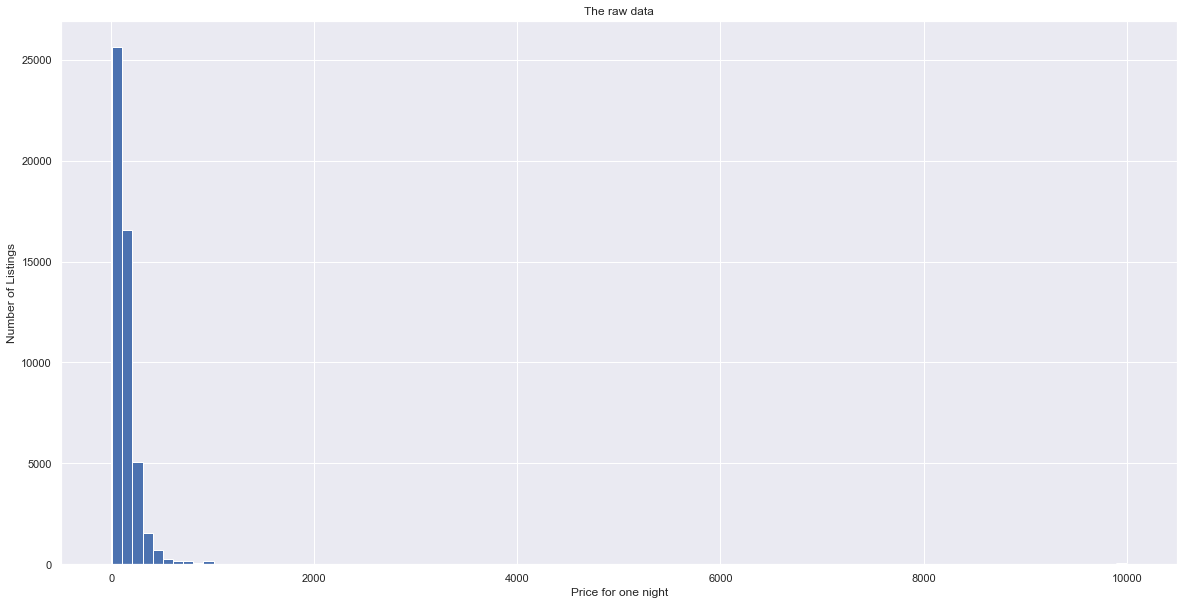

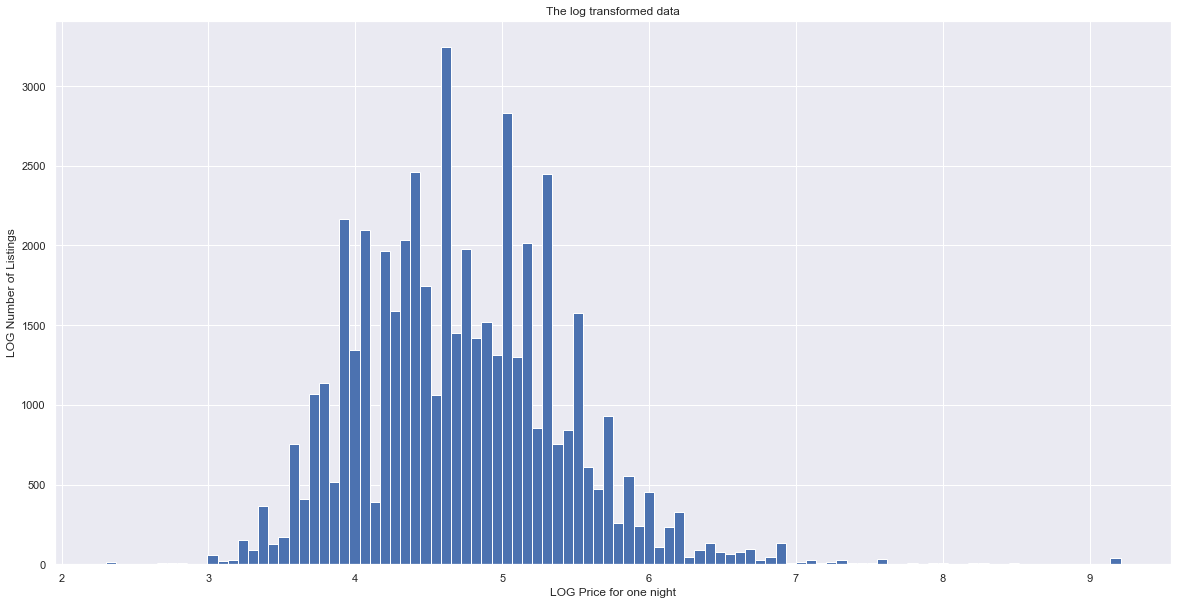

In [19]:
#Raw data
fig, ax = plt.subplots()
ax.hist(data.price, bins = 100)
plt.xlabel('Price for one night')
plt.ylabel('Number of Listings')
plt.title('The raw data')
plt.show()

#logged data
fig, ax = plt.subplots()
logged_data = np.log(data.loc[data.price > 0, 'price'])
ax.hist(logged_data, bins = 100)
plt.xlabel('LOG Price for one night')
plt.ylabel('LOG Number of Listings')
plt.title('The log transformed data')
plt.show()







# DATA EXPLORING AND VISUALIZATION




## How can we categorise listing prices as High, Medium or Low?

To create this chart, initially I set the lower bound as $ 75, and the higher bound as $ 500 for one night hosting price in NYC.


In [20]:
def rank_price(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'

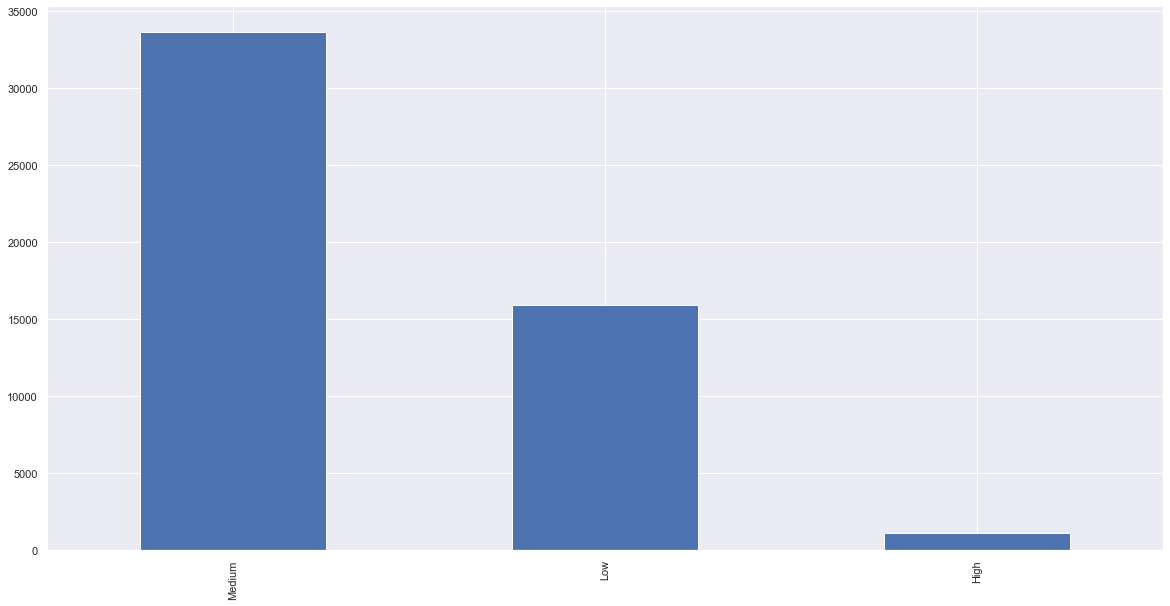

In [21]:
data.price.apply(rank_price).value_counts().plot(kind='bar')

### The result:
Shows that around 325000 listing is in the medium category while aroun 15000 listing is priced lower and 1000 listing is higher.

### Let's see this distinction on the base of boroughs.

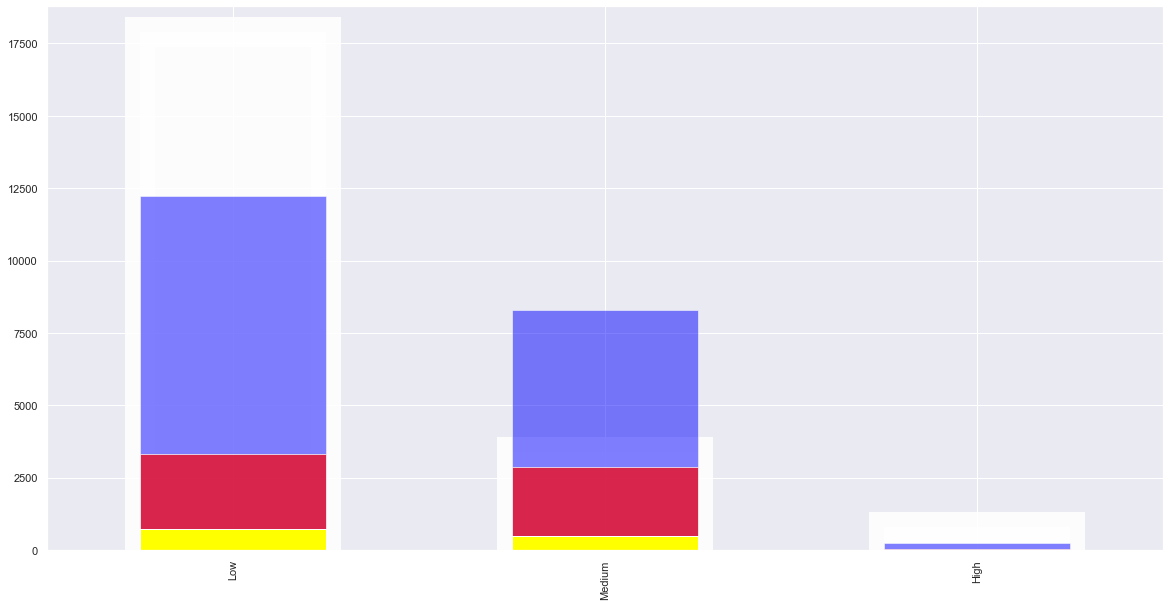

In [22]:
data.loc[data['neighbourhood_group'] == 'Manhattan'].price.apply(rank_price).value_counts().plot(kind='bar', color='white', alpha=0.9, lw=30)
data.loc[data['neighbourhood_group'] == 'Brooklyn'].price.apply(rank_price).value_counts().plot(kind='bar', color='blue', alpha=0.5)
data.loc[data['neighbourhood_group'] == 'Queens'].price.apply(rank_price).value_counts().plot(kind='bar', color='red', alpha=0.7)
data.loc[data['neighbourhood_group'] == 'Staten Island'].price.apply(rank_price).value_counts().plot(kind='bar', color='black')
data.loc[data['neighbourhood_group'] == 'Bronx'].price.apply(rank_price).value_counts().plot(kind='bar', color='yellow')

### The result:

Manhattan has quantitatively the most listings in the categories of 'Low' and 'High'.
<br> Brooklyn follows Manhattan by having the most listings in the category of 'Medium'.
<br> Manhattan and Brooklyn are the only boroughs who has listings in the category of 'High'.
<br> Staten Island has very low quantitiy of listings thus black color is not visible on this chart.
<br> Bronx has a few and same amount of listings in the categories of 'Low' and 'Medium'.

<br>
<br>

# What is the correlation between each categories?

<br>
To create this, I am going to use sns.heatmap.
<br>

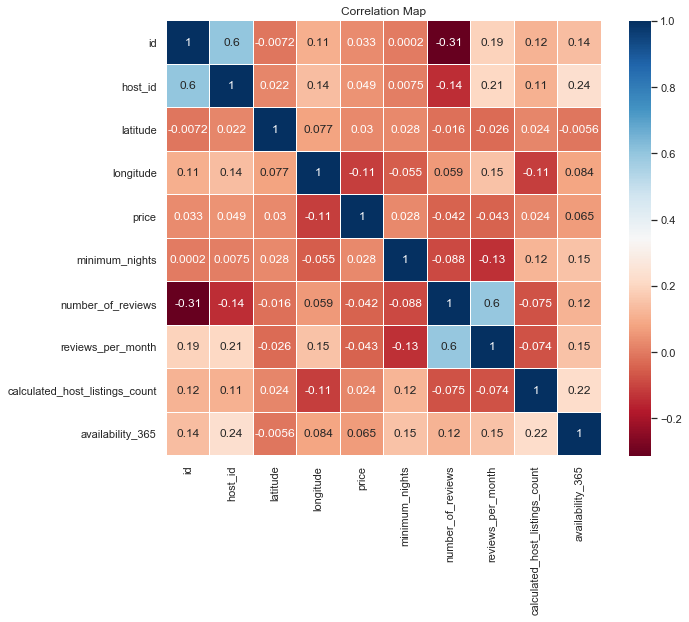

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

### The Result:

There is no strong correlation bewteen this categories apart from the link between 'number_of_reviews' and 'reviews_per_month'. 
<br>However this link is also understably logical because the more reviews, the more reviews per month.
<br>
<br>Thus, overall, all correlation between column categories are weak.

# What are the top words used in Airbnb listings?

To answer this question, I am going to use WordCloud.

In [24]:
import csv
from wordcloud import WordCloud

word_list = []
word_list= '\t'.join([str(i) for i in data.name])

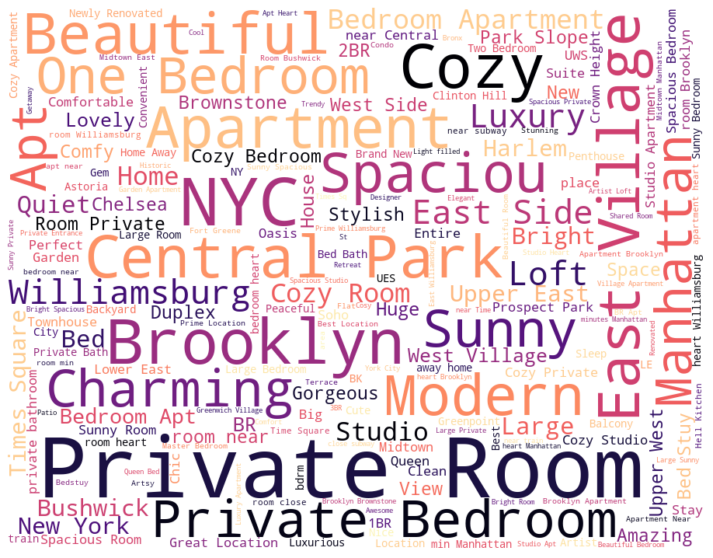

In [25]:
wordcloud = WordCloud(width=900, height=700, background_color="white", colormap="magma").generate(word_list)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### The Result:

According to this WordMap, 'Private Room', 'Apartment', and 'NYC' are the top 3 words used in listing title on AirBNB.

# What is the avarage price per night in NYC?


First, I simply calculated the mean of all listing prices.

Secondly, I calculated the avarege price according to top reviewed listings to eliminate unpopular/inactivated listings.

Thirdly, I calculated the avarege price according to cleaned data from outliers.


In [26]:
price_avrg = data.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 158.22181365280827


In [27]:
top_reviewed_listings = data.nlargest(100,'number_of_reviews')
price_avrg = top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 94.52


In [28]:
filtered_price_avg = price_new.mean()
print('Average price per night: {}'.format(filtered_price_avg))

Average price per night: 113.54639354600214


# How do prices of listings vary by location?

Let's calculate the price disperse according to 5 boroughs: 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'.

1) To do this, first I divided the data into 5 sub data. Then I used sns.stripplot.

2) Because of these sub-data groups have outliers, I used the price_new data to see closely the disperse via sns.violinplot.

3) Not to lose extra expensively priced listings, I also used logged_data with sns.barplot.

In [29]:
data.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [30]:
sub_1= data.loc[data['neighbourhood_group'] == 'Manhattan']
sub_2= data.loc[data['neighbourhood_group'] == 'Brooklyn']
sub_3= data.loc[data['neighbourhood_group'] == 'Queens']
sub_4= data.loc[data['neighbourhood_group'] == 'Staten Island']
sub_5= data.loc[data['neighbourhood_group'] == 'Bronx']

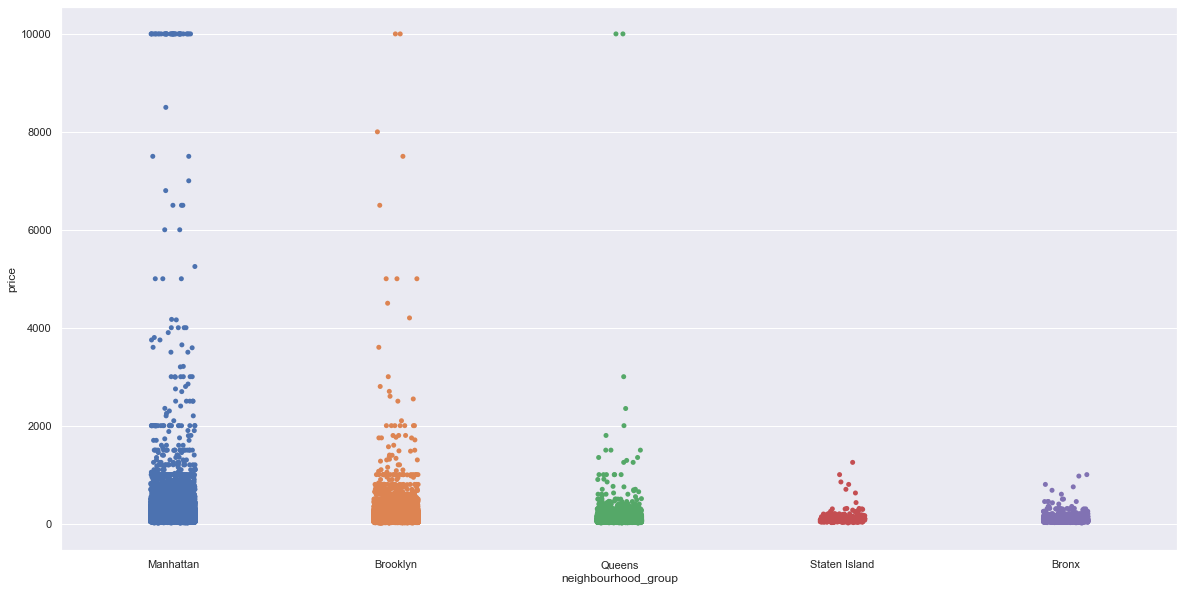

In [31]:
sns.stripplot(x=data.neighbourhood_group, y=data.price)

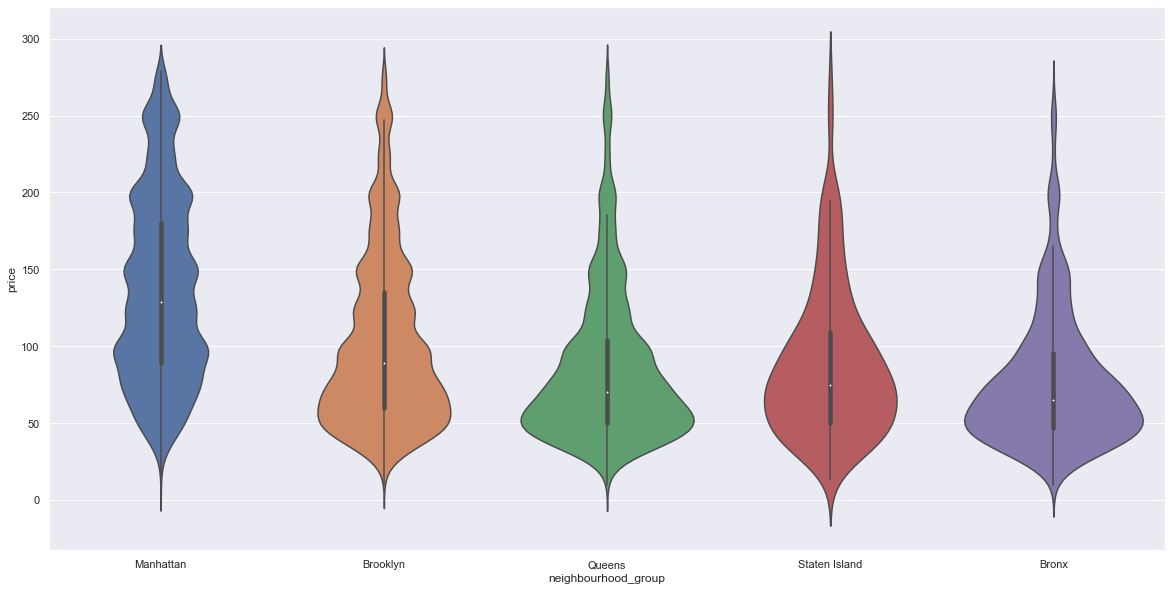

In [32]:
# There are a lot of outliers above, I am going to go with filtered price.
sns.violinplot(x=data.neighbourhood_group, y=price_new)

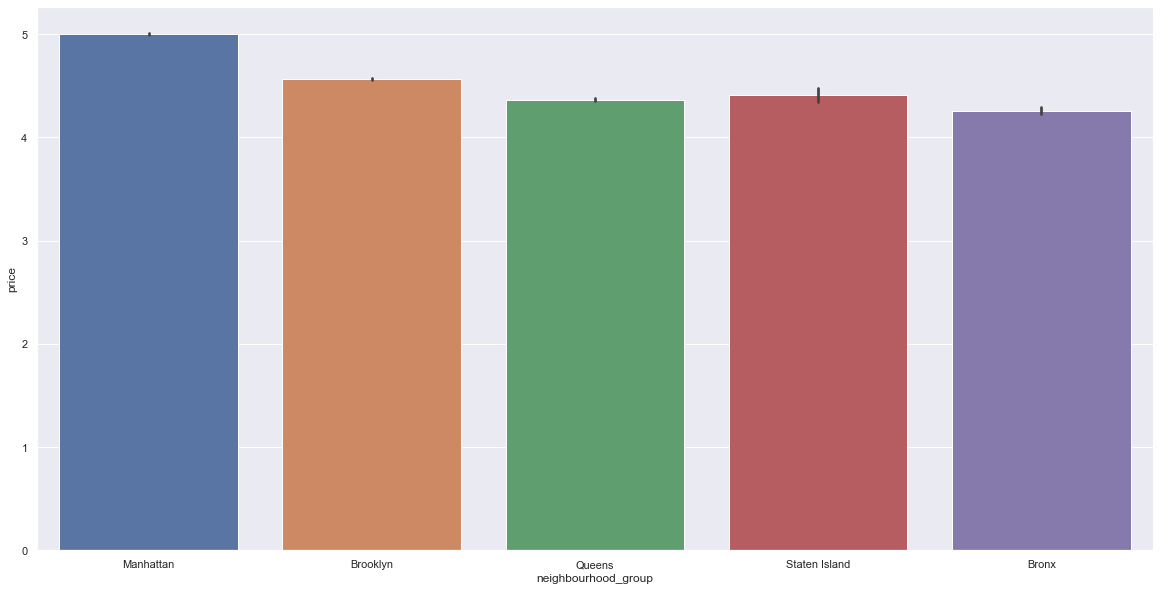

In [33]:
#logged data
sns.barplot(x=data.neighbourhood_group, y=logged_data)

# What is the disperse of room types related to boroughs?

1) First I examined the types of rooms.

2) Then, sub-data groups are created according to boroughs' sub-data created in previous question's answer.

3) A data frame created to see the amount of listings according to arranged distrubution above.

4) A plot is created to visualize this dataset.

5) This is a shortcut. In just one step, you can analyze all data reached above in 4 steps thanks to sns.countplot.

In [34]:
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [35]:
# Room type distribution
room1 = sub_1['room_type'].value_counts()
room2 = sub_2['room_type'].value_counts()
room3 = sub_3['room_type'].value_counts()
room4 = sub_4['room_type'].value_counts()
room5 = sub_5['room_type'].value_counts()
room = pd.DataFrame([room1,room2,room3,room4,room5],index=['Manhattan','Brooklyn','Queens','Staten Island','Bronx'])
room.head()

Entire home/apt  Private room  Shared room  Hotel room
Manhattan              13381.0        7877.0        470.0       337.0
Brooklyn                9863.0       10326.0        497.0        43.0
Queens                  2264.0        3679.0        216.0        37.0
Staten Island            194.0         179.0          5.0         NaN
Bronx                    431.0         718.0         66.0         NaN

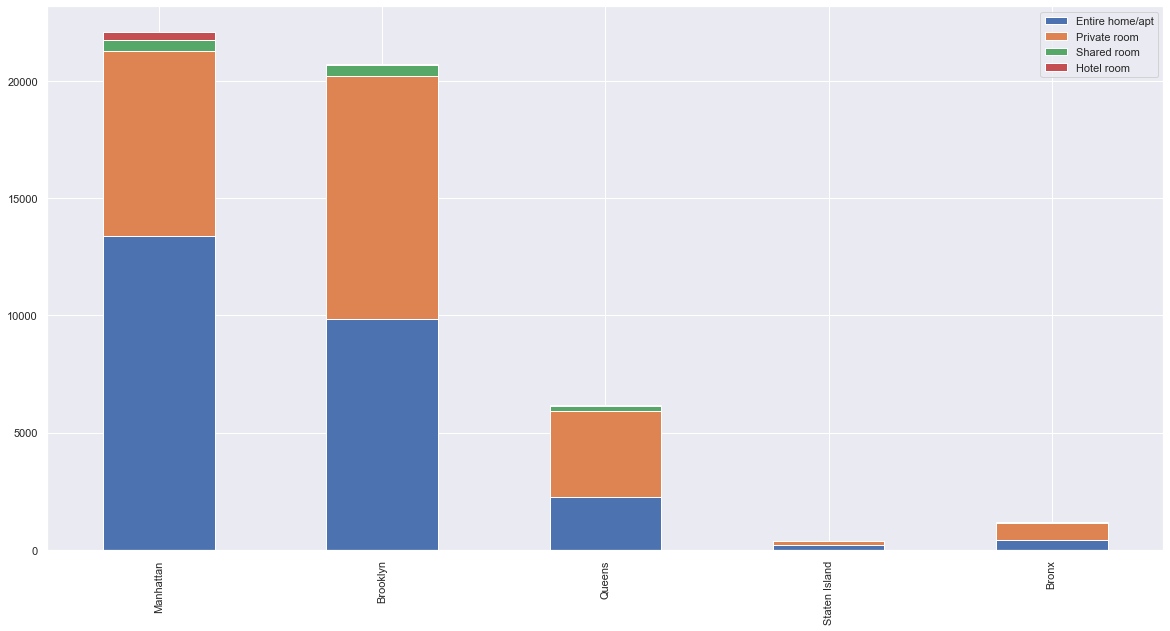

In [36]:
room.plot(kind='bar',stacked=True)

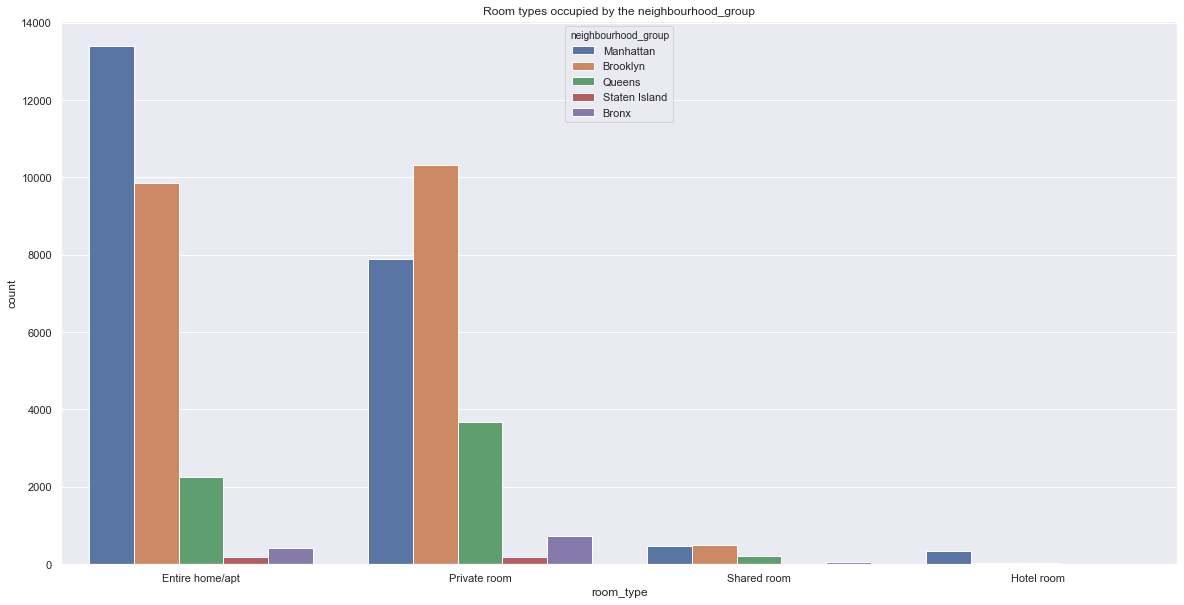

In [37]:
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

# The Results:

Hotels are listed on AirBNB mostly for Manhattan which has also the most amount of Entire home-Apt listings.
Brooklyn's listings are generally based on Private Room.
While shared rooms and hotel rooms are the least popular listings, entire room and private rooms listings significantly have higher demand.


# What is the disturbution of room types according to longtitude and latitude?


I used sns.scatterplot to see the answer.

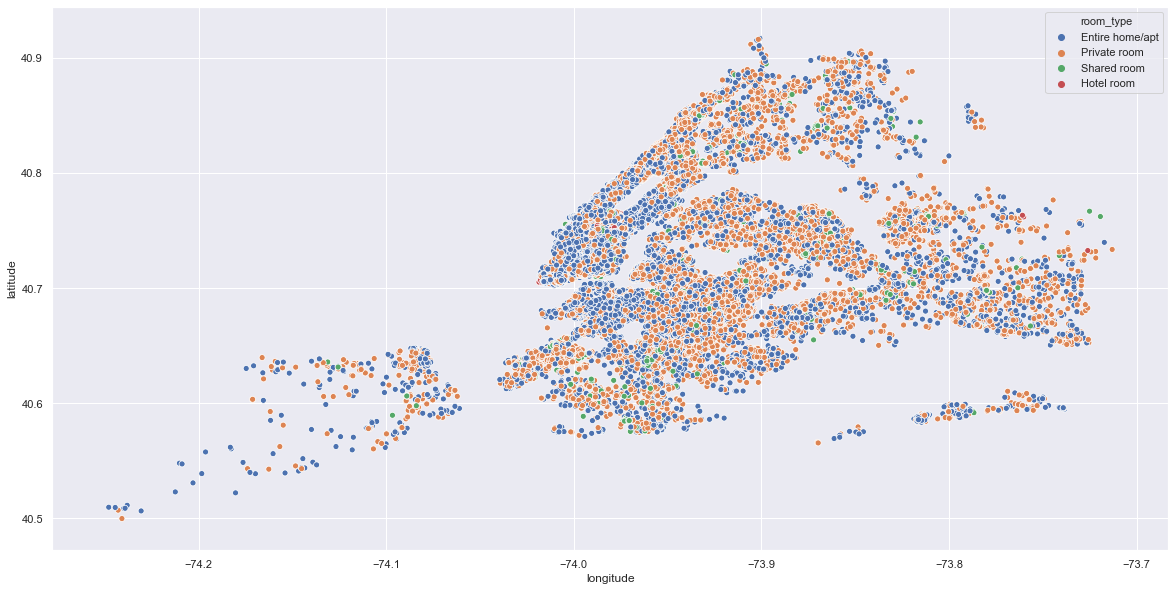

In [38]:
sns.scatterplot(data.longitude, data.latitude, hue=data.room_type )
plt.ioff()

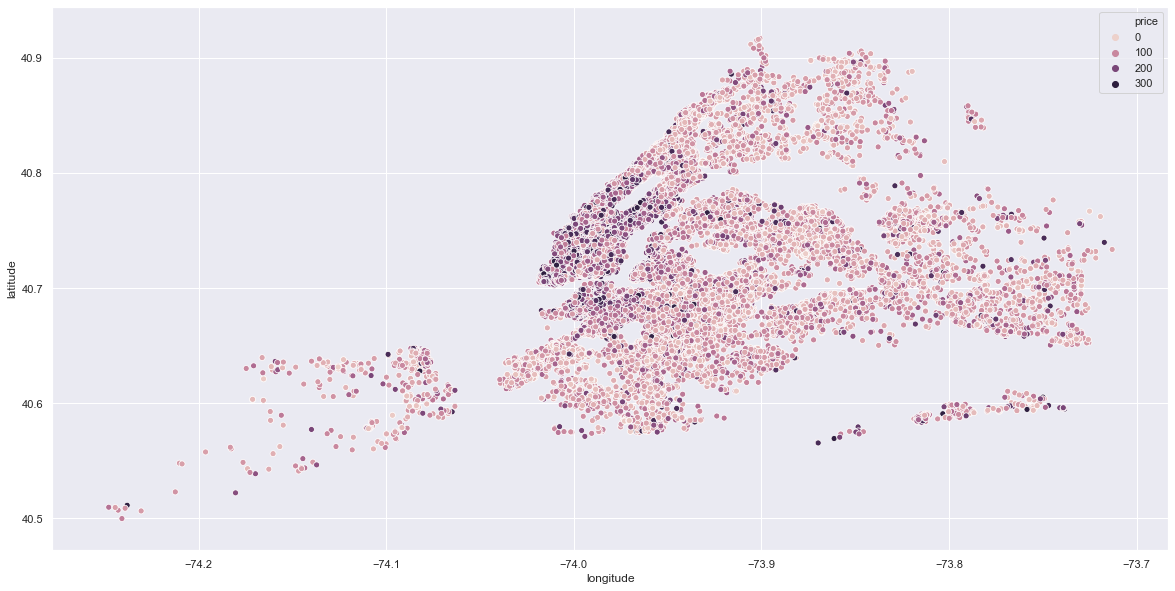

In [39]:
sns.scatterplot(data.longitude, data.latitude, hue=price_new)
plt.ioff()

# The map above is so ambigue, I am going to check borough by borough:

# Manhattan Price Map

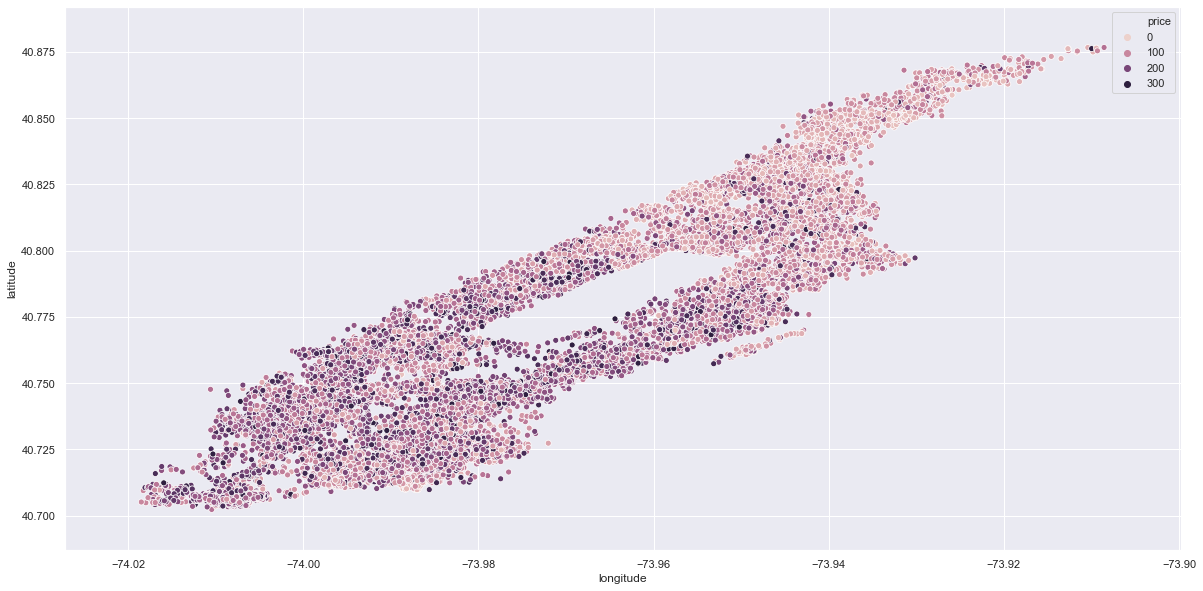

In [40]:
sns.scatterplot(sub_1.longitude, sub_1.latitude, hue=price_new)
plt.ioff()

## The gap above is Central Park.
## The latitude of Central Park, New York, NY, USA is 40.785091, and the longitude is -73.968285


### I wished to find out "How prices vary according to distance from 'Central Park'?" but couldn't filtered.

# Brooklyn Price Map

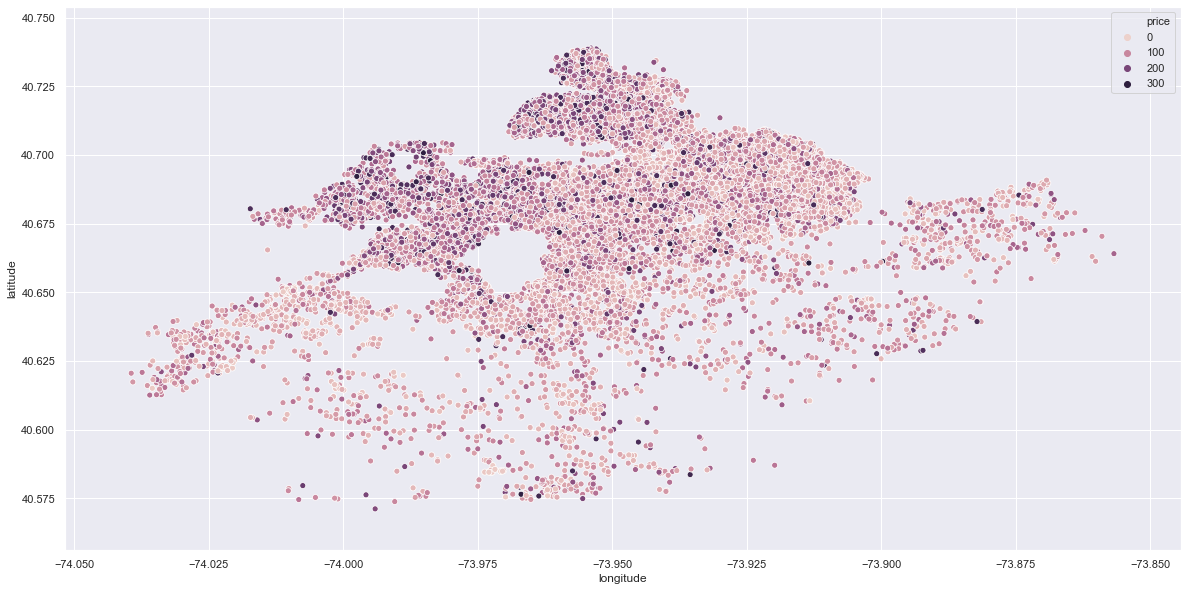

In [41]:
sns.scatterplot(sub_2.longitude, sub_2.latitude, hue=price_new)
plt.ioff()

# Queens Price Map

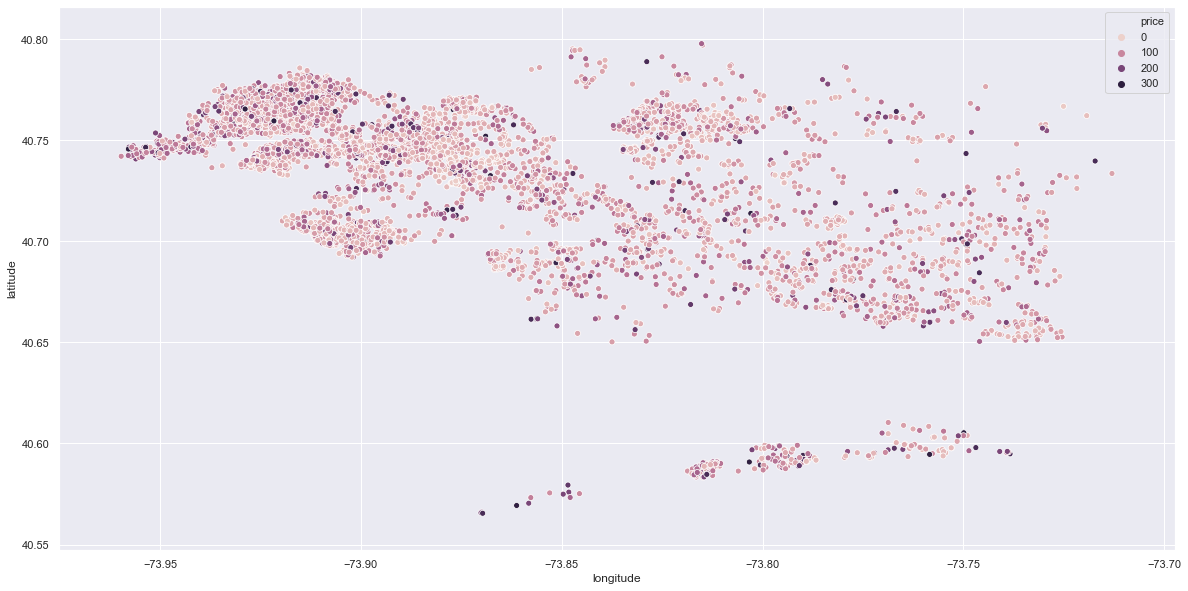

In [42]:
sns.scatterplot(sub_3.longitude, sub_3.latitude, hue=price_new)
plt.ioff()

# Staten Island Price Map

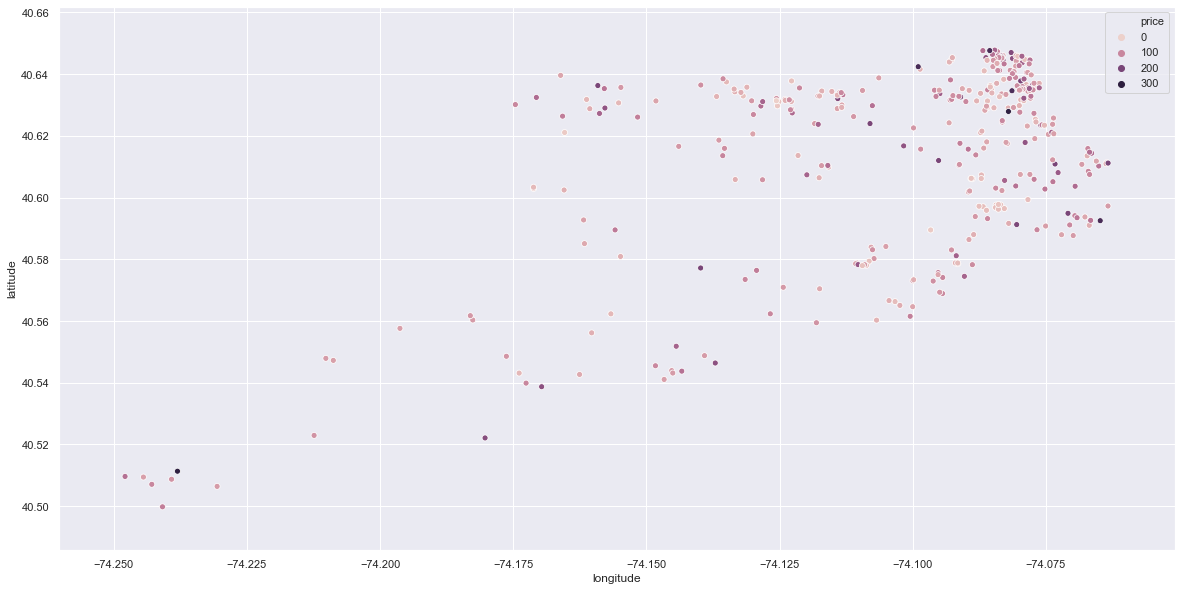

In [43]:
sns.scatterplot(sub_4.longitude, sub_4.latitude, hue=price_new)
plt.ioff()

# Bronx Price Map

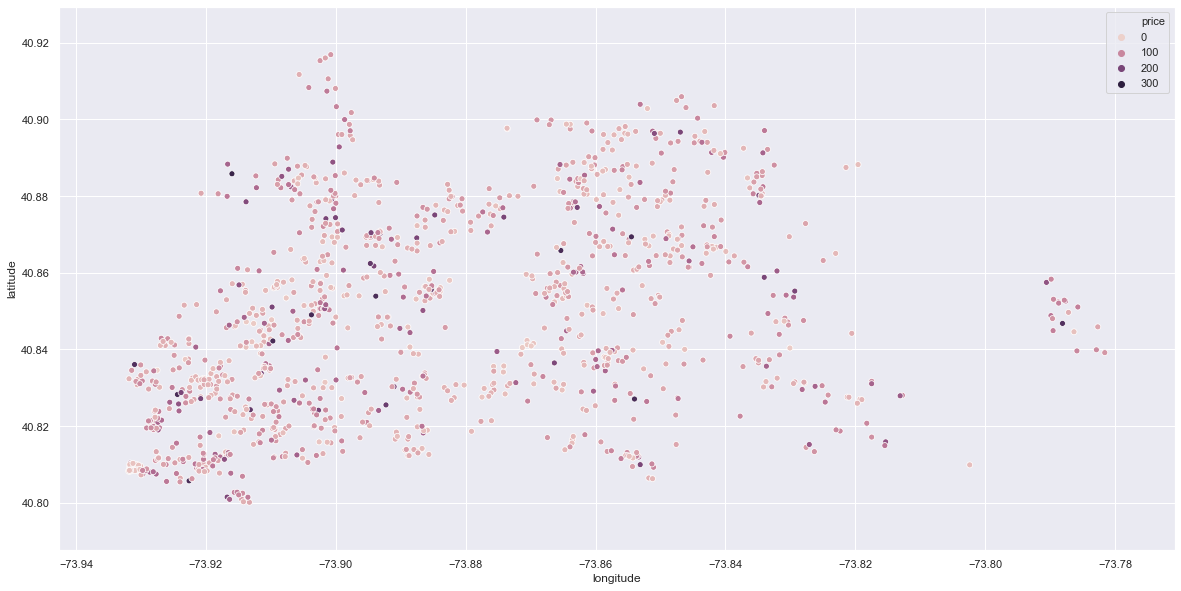

In [44]:
sns.scatterplot(sub_5.longitude, sub_5.latitude, hue=price_new)
plt.ioff()

# Which borough's availability over year is higher than others?

To see this, I used sns.boxplot and applied it on the map via sns.scatterplot.

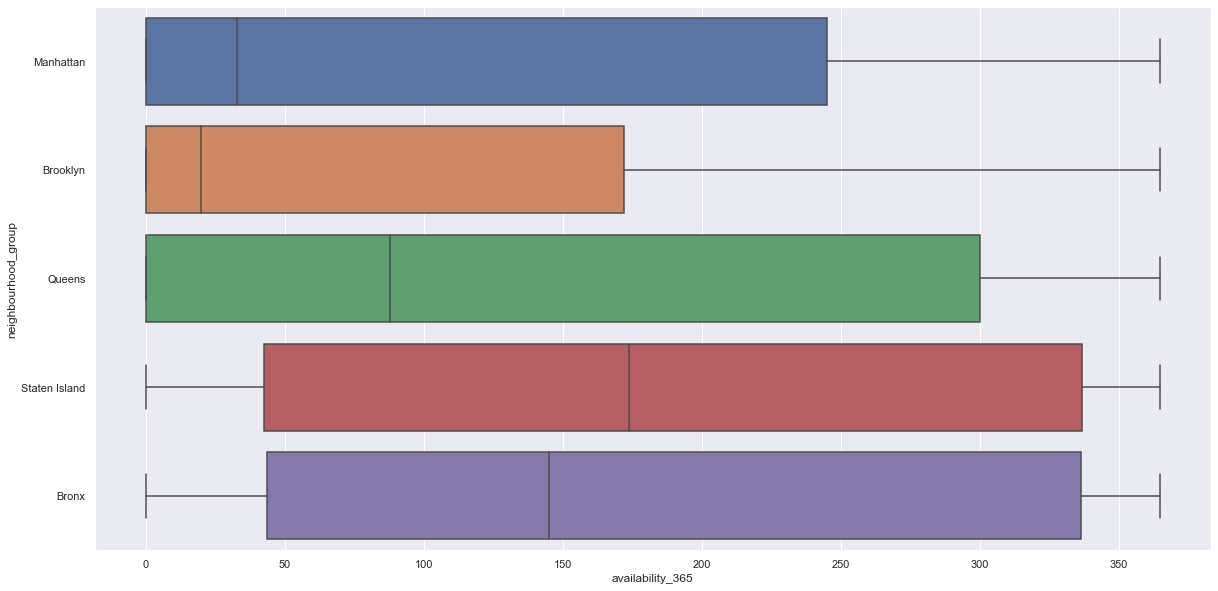

In [45]:
sns.boxplot(x=data.availability_365, y=data.neighbourhood_group)

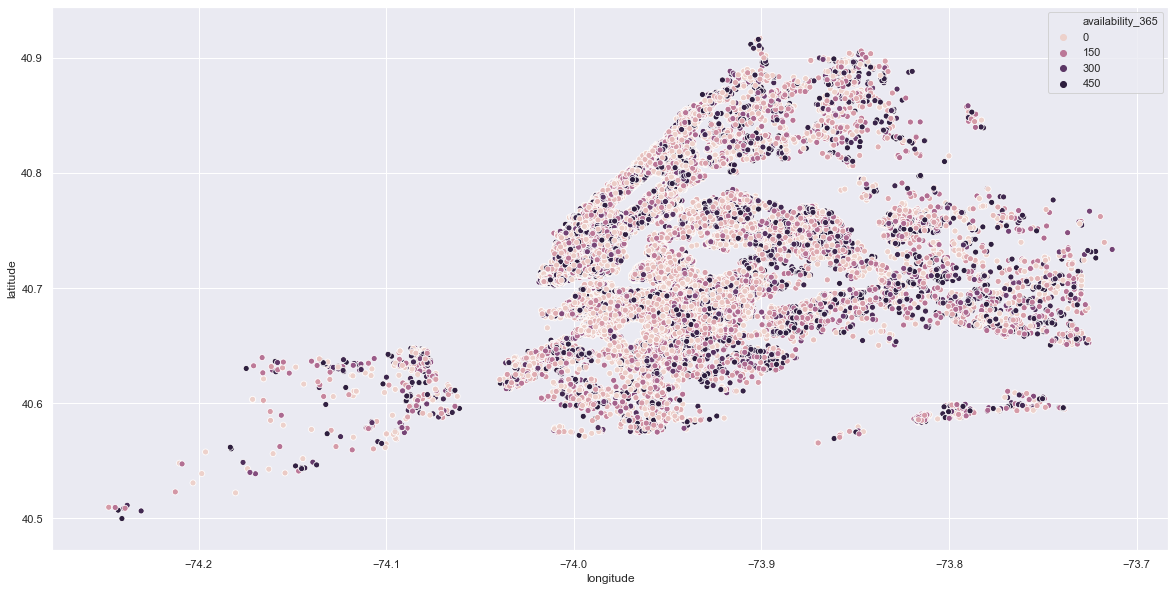

In [46]:
sns.scatterplot(data.longitude, data.latitude, hue=data.availability_365)
plt.ioff()

# The Results:

While Manhattan and Brooklyn listings are occupied in high numbers, Staten Island and Bronx listings are mostly available through the year.

# Statistics

## To do analysis of variance, I am going to use ANOVA instead of t-test becuase there are more than 2( 5 ) boroughs to compare their means of prices.

# ANOVA

In [47]:
#Detect the borough who has the min quantity of sample to filter data.

print(len(sub_1.price))
print(len(sub_2.price))
print(len(sub_3.price))
print(len(sub_4.price))
print(len(sub_5.price))


22065
20729
6196
378
1215


In [48]:
# Create sub categorizes for each boroughs' price values in Numpy Array

manh = data.loc[data['neighbourhood_group'] == 'Manhattan'].price.values[:379]
broo = data.loc[data['neighbourhood_group'] == 'Brooklyn'].price.values[:379]
quee = data.loc[data['neighbourhood_group'] == 'Queens'].price.values[:379]
stat = data.loc[data['neighbourhood_group'] == 'Staten Island'].price.values
bron = data.loc[data['neighbourhood_group'] == 'Bronx'].price.values[:379]

In [49]:
# Calculate the means

print("Mean of Manhattan : ",np.mean(manh))
print("Mean of Brooklyn : ",np.mean(broo))
print("Mean of Queens : ",np.mean(quee))
print("Mean of Staten Island : ",np.mean(stat))
print("Mean of Bronx : ",np.mean(bron))

total_mean = (np.mean(manh) + np.mean(broo) + np.mean(quee) + np.mean(stat) + np.mean(bron)) /5
print("Total Mean: ",np.mean(total_mean))


Mean of Manhattan :  178.56200527704485
Mean of Brooklyn :  151.78891820580475
Mean of Queens :  100.07651715039577
Mean of Staten Island :  105.25925925925925
Mean of Bronx :  83.69656992084433
Total Mean:  123.87665396266979


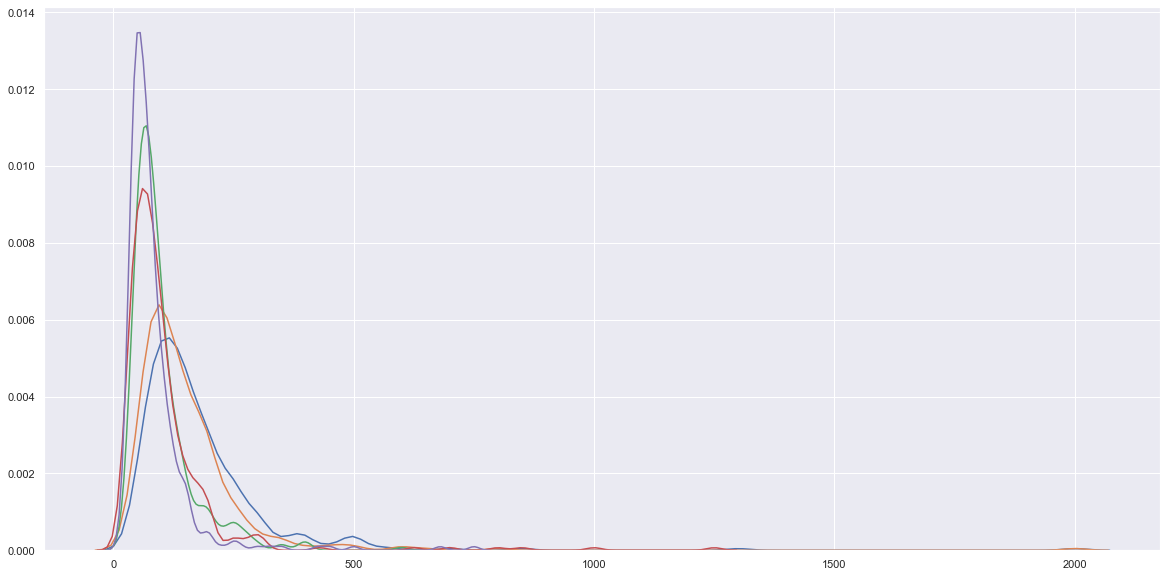

In [50]:
# Visualize with pdf

sns.kdeplot(manh)
sns.kdeplot(broo)
sns.kdeplot(quee)
sns.kdeplot(stat)
sns.kdeplot(bron)
plt.show()

# F Distribution

In [51]:
from scipy import stats

print(" F Value: ", stats.f_oneway(manh, broo, quee, stat, bron))


 F Value:  F_onewayResult(statistic=46.0323353773839, pvalue=5.9744241251121825e-37)


Not identical as Normal distribution.

F value < critical value -- fail to reject null hypothesis
F value > critical value -- reject null hypothesis

## Let's calculate critical value according to F distribution table.

Degrees of freedom for groups: Number of groups - 1
5 - 1 = 4

degrees of freedom for error: (number of rows - 1)* number of groups
(378 - 1) * 5 = 1885

Because of that F value is higher than critical value,
We reject to null hypothesis.

46.03 (f-value) > 3.31 (critical value)

# ANOVA VOL.2

# manh = data.loc[(data['neighbourhood_group'] == 'Manhattan') & ()].price.values[:379]

In [52]:
# Create sub categorizes for each boroughs' price values in Numpy Array

manh = data.loc[data['neighbourhood_group'] == 'Manhattan'].price.values[:379]
broo = data.loc[data['neighbourhood_group'] == 'Brooklyn'].price.values[:379]
quee = data.loc[data['neighbourhood_group'] == 'Queens'].price.values[:379]
stat = data.loc[data['neighbourhood_group'] == 'Staten Island'].price.values
bron = data.loc[data['neighbourhood_group'] == 'Bronx'].price.values[:379]

In [53]:
boroughs = pd.DataFrame(zip(manh, broo, quee, stat, bron), columns=['manh', 'broo', 'quee', 'stat', 'bron'])
print(boroughs)

     manh  broo  quee  stat  bron
0     225    89   130    70    45
1     200    60    90    38    55
2      79    89   140    38    50
3      79   140    79    37    90
4     150   199   350    38   105
..    ...   ...   ...   ...   ...
373    75   199   195    90    72
374    80   105   100   250    45
375   125   135    89    85    40
376   387   199   100    79   250
377    95   125    63    75    26

[378 rows x 5 columns]


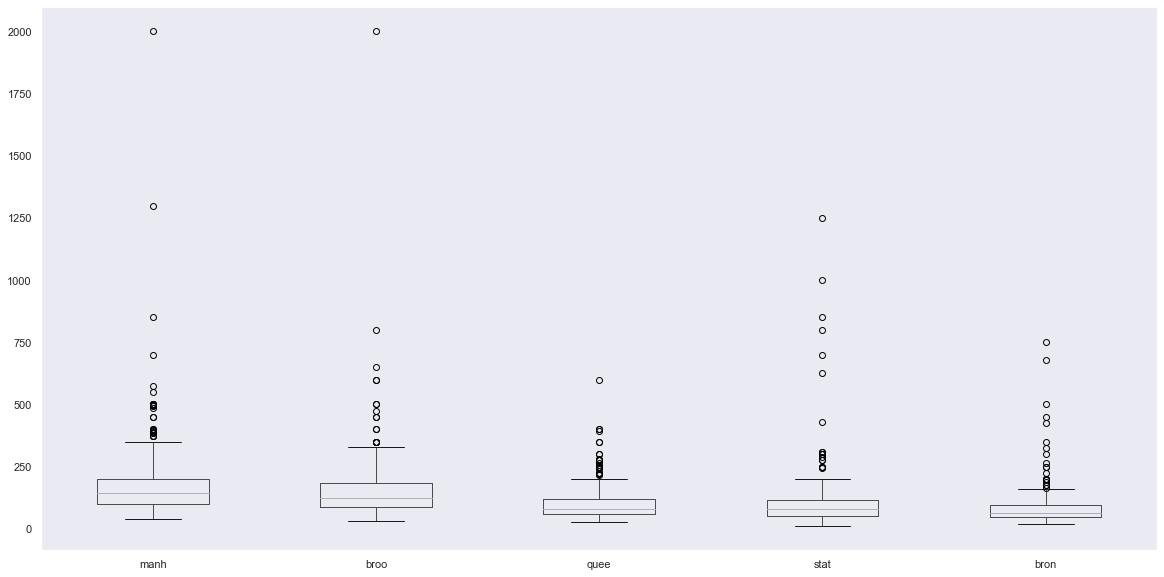

In [54]:
boroughs.boxplot(column=['manh', 'broo', 'quee', 'stat', 'bron'], grid=False)

In [55]:
# load packages
import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(boroughs.manh, boroughs.broo, boroughs.quee, boroughs.stat, boroughs.bron)
print(fvalue, pvalue)

46.03948229085221 5.946633740679608e-37


In [56]:
# get ANOVA table as R like output

import statsmodels.api as sm
from statsmodels.formula.api import ols

# reshape the d dataframe suitable for statsmodels package 
boroughs_melt = pd.melt(boroughs.reset_index(), id_vars=['index'], value_vars=['manh', 'broo', 'quee', 'stat', 'bron'])

# replace column names
boroughs_melt.columns = ['index', 'treatments', 'value']

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=boroughs_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df          F        PR(>F)
C(treatments)  2.389870e+06     4.0  46.039482  5.946634e-37
Residual       2.446218e+07  1885.0        NaN           NaN

The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

In [57]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=boroughs_melt['value'], groups=boroughs_melt['treatments'], alpha=0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
  bron   broo  68.2857  0.001   45.6607  90.9107   True
  bron   manh  95.0265  0.001   72.4015 117.6514   True
  bron   quee  16.4841 0.2716   -6.1409  39.1091  False
  bron   stat  21.5132 0.0716   -1.1118  44.1382  False
  broo   manh  26.7407 0.0111    4.1158  49.3657   True
  broo   quee -51.8016  0.001  -74.4266 -29.1766   True
  broo   stat -46.7725  0.001  -69.3975 -24.1475   True
  manh   quee -78.5423  0.001 -101.1673 -55.9173   True
  manh   stat -73.5132  0.001  -96.1382 -50.8882   True
  quee   stat   5.0291    0.9  -17.5959  27.6541  False
-------------------------------------------------------


Above results from Tukey HSD suggests that except 3 pairs: 

1) Bronx-Queens

2) Bronx-StatenIslands

3) Queens-StatenIslands

all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.

# T-Distribution


In [58]:
# Create sub categorizes for each boroughs' price values in Numpy Array

manh = data.loc[data['neighbourhood_group'] == 'Manhattan'].price.values
broo = data.loc[data['neighbourhood_group'] == 'Brooklyn'].price.values
quee = data.loc[data['neighbourhood_group'] == 'Queens'].price.values
stat = data.loc[data['neighbourhood_group'] == 'Staten Island'].price.values
bron = data.loc[data['neighbourhood_group'] == 'Bronx'].price.values

Mean of Manhattan :  210.99542261500113
standart deviation 1:  474.38020906990107
variance 1:  225036.58275720302
mean 2:  124.45062472864103
standart deviation 2:  193.36214890407248
variance 2:  37388.920628800704


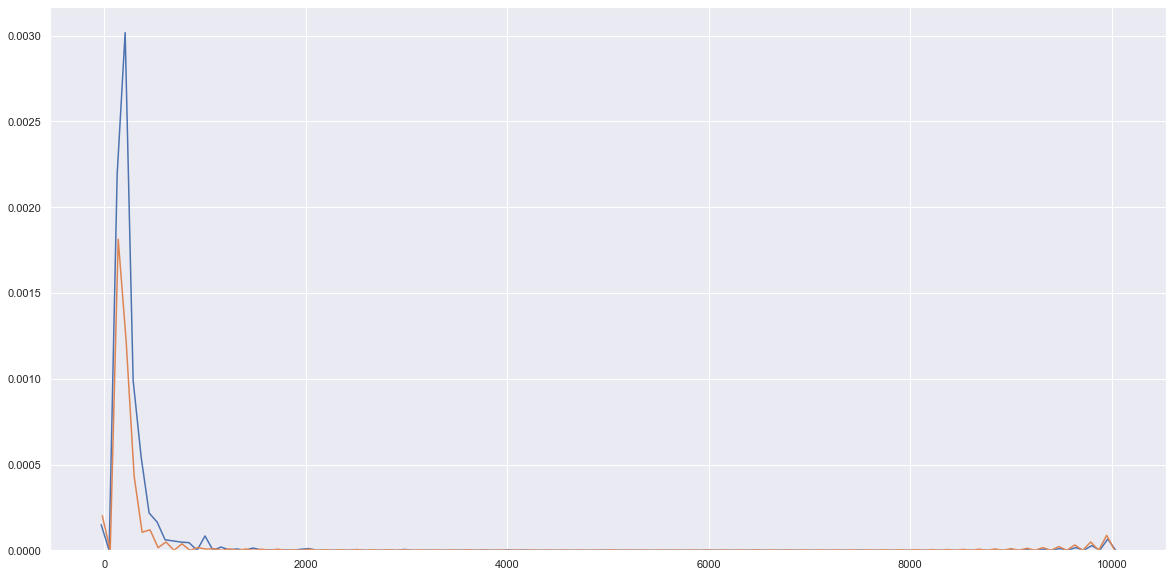

In [59]:
# Manhattan Info
print("Mean of Manhattan : ", np.mean(manh))
print("standart deviation 1: ", np.std(manh))
print("variance 1: ", np.var(manh))

# Brooklyn Info
print("mean 2: ", np.mean(broo))
print("standart deviation 2: ", np.std(broo))
print("variance 2: ", np.var(broo))

#Visualize with pdf
import seaborn as sns
sns.kdeplot(manh)
sns.kdeplot(broo)
plt.show()

In [60]:
t_val = np.abs(np.mean(manh)-np.mean(broo))/np.sqrt((np.var(manh)/len(manh))+(np.var(broo)/len(broo)))
print("t-value: ", t_val)

t-value:  24.980725117912545


Null hypothesis: There is no difference related to statistical significance between these 2 distributions.
t value > critical value --------> fail to reject null hypothesis

#  Machine Learning 

In [61]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import statsmodels.api as sm
from scipy import stats
import  scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import statsmodels
import statsmodels.api as sm
#print(statsmodels.__version__)

from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample


In [62]:
data=pd.read_csv(r'C:\Users\guzel\Desktop\airbnb_NYC\listings.csv')

In [63]:
data.head()

id                                       name  host_id    host_name  \
0  2595                      Skylit Midtown Castle     2845     Jennifer   
1  3831            Cozy Entire Floor of Brownstone     4869  LisaRoxanne   
2  5099  Large Cozy 1 BR Apartment In Midtown East     7322        Chris   
3  5121                            BlissArtsSpace!     7356        Garon   
4  5178           Large Furnished Room Near B'way      8967     Shunichi   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75362  -73.98377   
1            Brooklyn        Clinton Hill  40.68514  -73.95976   
2           Manhattan         Murray Hill  40.74767  -73.97500   
3            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
4           Manhattan      Hell's Kitchen  40.76489  -73.98493   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    225              10                 48  2019-11-04   
1  Entire home/apt     89               1                295  2019-11-22   
2  Entire home/apt    200               3                 78  2019-10-13   
3     Private room     60              29                 49  2017-10-05   
4     Private room     79               2                454  2019-11-21   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.39                               1                 1  
1               4.67                               1                 1  
2               0.60                               1                19  
3               0.38                               1               365  
4               3.52                               1               242

In [64]:
data.fillna({'name':0}, inplace=True)
data.fillna({'last_review':0}, inplace=True)
data.fillna({'reviews_per_month':0}, inplace=True)
data.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                         563
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                         0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [65]:
# After analysis, I have decided to drop these columns as they will not be useful in prediction
data.drop(["name","last_review","host_id", "id", "neighbourhood", "host_name"], axis=1, inplace=True)

In [66]:
# Get rid of strings and create numerical data.
numeric_data = pd.get_dummies(data, columns=["neighbourhood_group","room_type"], prefix = ['ng',"rt"],drop_first=True)

In [67]:
numeric_data.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.75362  -73.98377    225              10                 48   
1  40.68514  -73.95976     89               1                295   
2  40.74767  -73.97500    200               3                 78   
3  40.68688  -73.95596     60              29                 49   
4  40.76489  -73.98493     79               2                454   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.39                               1                 1   
1               4.67                               1                 1   
2               0.60                               1                19   
3               0.38                               1               365   
4               3.52                               1               242   

   ng_Brooklyn  ng_Manhattan  ng_Queens  ng_Staten Island  rt_Hotel room  \
0            0             1          0                 0              0   
1            1             0          0                 0              0   
2            0             1          0                 0              0   
3            1             0          0                 0              0   
4            0             1          0                 0              0   

   rt_Private room  rt_Shared room  
0                0               0  
1                0               0  
2                0               0  
3                1               0  
4                1               0

In [68]:
x = numeric_data.loc[:, numeric_data.columns != 'price']

In [69]:
y = numeric_data["price"]

# Create Training and Test Data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (40479, 14)
Dimensions of the training target vector: (40479,)
Dimensions of the test feature matrix: (10120, 14)
Dimensions of the test target vector: (10120,)


# Standardization

In [72]:
scaler = RobustScaler() # Difference from StandardScaler is to remove outliers.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
Least- Squared Error (Minimize Sum of Squared Errors-SSE)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('LR coef: ', lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse = mean_squared_error(y_test, y_predicted_dummy)
rmse = np.sqrt(mse)
print('Linear Regression MSE: ', mse)
print('Linear Regression RMSE: ', rmse)

# Ridge Regression (L2)
TO avoid overfit, we also minimize Lamda*Slopper in Ridge Regression in addition to min squared error.

Ridge Coef : [-2.36475507e+01 -2.48338550e+01  1.82693598e-01 -5.67334391e+00
 -7.76563025e+00 -4.00620748e-01  4.63332544e+01 -5.02492761e+01
  3.68553010e+01 -1.05588159e+01 -1.84550182e+02 -2.90899460e+01
 -9.03236038e+01 -1.28429040e+02]
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, random_state=42, solver='auto',
      tol=0.001)
Ridge MSE:  112016.44348145518
------------------------------------------------


Text(0.5, 1.0, 'Ridge')

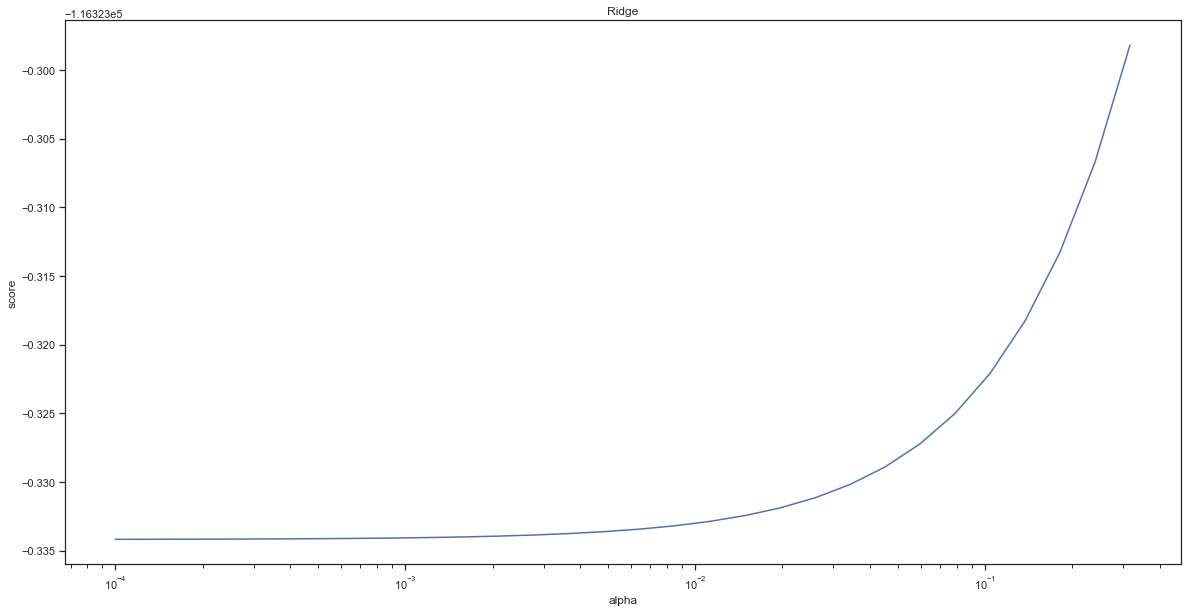

In [74]:
ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [ {'alpha' : alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = 'neg_mean_squared_error', refit = True)
clf.fit(X_train, y_train)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print('Ridge Coef :', clf.best_estimator_.coef_)

ridge  = clf.best_estimator_

print('Ridge Best Estimator: ', ridge)

y_predicted_dummy = clf.predict(X_test)

mse = mean_squared_error(y_test, y_predicted_dummy)
rmse = np.sqrt(mse)
print('Ridge MSE: ', mse)
print('Ridge RMSE: ', rmse)
print("------------------------------------------------")

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Ridge')

# Lasso (L1)

Difference from Ridge is to minimize lamda*|slope| not lamda*(slope)**2

The other difference is unsignificant coefs are accepted as 0.(No effect to other dependents. In other words
If there is a high correlated feature, Lasso use just one of those and accept others as 0.
Lasso prevents over fitting similar to Ridge.

Lasso Coef : [ -22.92006578  -24.64355751    0.18726548   -5.67301192   -7.72947761
   -0.39811332   46.18188973  -46.34864321   39.88195601   -7.30649982
 -176.12225314  -25.54594366  -90.2194084  -127.22224085]
Lasso Best Estimator:  Lasso(alpha=0.02592943797404667, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)
Lasso MSE:  112015.2263969845
------------------------------------------------


Text(0.5, 1.0, 'Lasso')

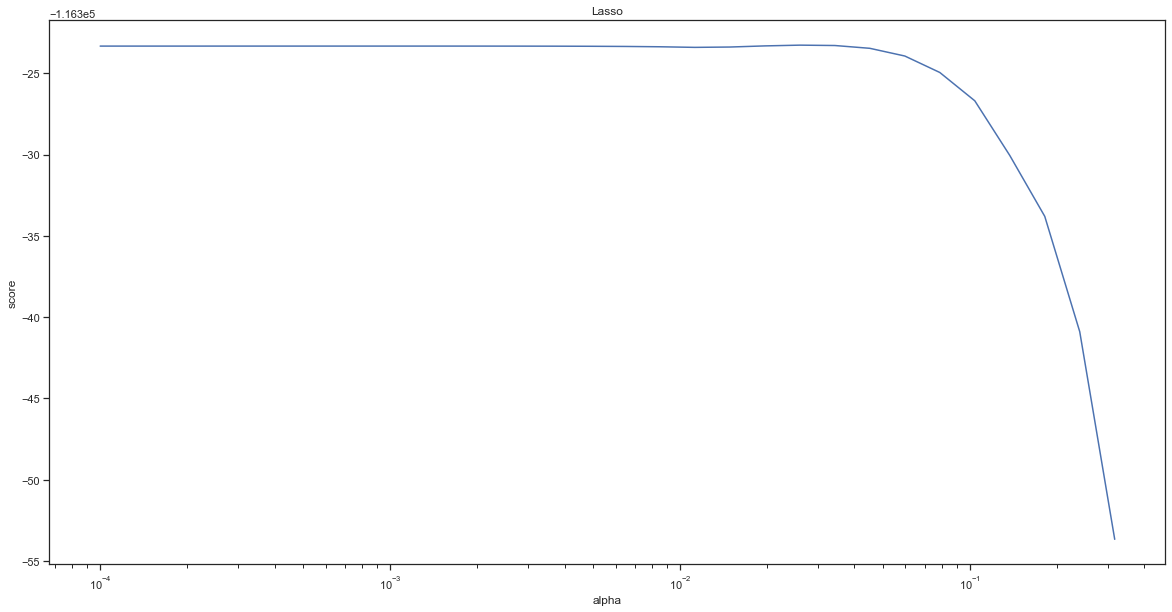

In [75]:
lasso = Lasso(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [ {'alpha' : alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv = n_folds, scoring = 'neg_mean_squared_error', refit = True)
clf.fit(X_train, y_train)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print('Lasso Coef :', clf.best_estimator_.coef_)

lasso  = clf.best_estimator_

print('Lasso Best Estimator: ', lasso)

y_predicted_dummy = clf.predict(X_test)

mse = mean_squared_error(y_test, y_predicted_dummy)
rmse = np.sqrt(mse)

print('Lasso MSE: ', mse)
print('Lasso RMSE: ', rmse)
print("------------------------------------------------")

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Lasso')

# Elastic Net
uses the strong features of both Lasso and Ridge.
very useful while high correlated features' implemention.


In [76]:
parametersGrid = {'alpha' : alphas,
                  'l1_ratio' : np.arange(0.0, 1.0, 0.05)}

eNet = ElasticNet(random_state = 42, max_iter = 10000)

clf = GridSearchCV(eNet, parametersGrid, cv = n_folds, scoring = 'neg_mean_squared_error', refit = True)
clf.fit(X_train, y_train)

print('ElasticNet Coef :', clf.best_estimator_.coef_)
print('ElasticNet Best Estimator: :', clf.best_estimator_)

y_predicted_dummy = clf.predict(X_test)

mse = mean_squared_error(y_test, y_predicted_dummy)
rmse = np.sqrt(mse)

print('ElasticNet MSE: ', mse)
print('ElasticNet RMSE: ', rmse)

C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1835541758.2498138, tolerance: 385272.1484026063
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1857409510.2736647, tolerance: 390195.51960699755
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1997986577.0126827, tolerance: 418700.90077877266
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1857870907.6486697, tolerance: 390195.51960699755
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1998419048.564041, tolerance: 418700.90077877266
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1675903901.2987366, tolerance: 353847.059715085
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2000207232.3375702, tolerance: 418700.90077877266
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1677676679.2304878, tolerance: 353847.059715085
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2042332413.2546825, tolerance: 427113.0698385252
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1683168363.3411884, tolerance: 353847.059715085
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2047871728.6824365, tolerance: 427113.0698385252
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1844352071.5406957, tolerance: 385272.1484026063
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2061694525.807561, tolerance: 427113.0698385252
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1859341735.482115, tolerance: 385272.1484026063
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1881649775.3153338, tolerance: 390195.51960699755
  positive)
C:\Users\guzel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

ElasticNet Coef : [ -23.09698239  -24.50958453    0.18582122   -5.67506973   -7.76192893
   -0.39864104   46.24383615  -46.89682006   39.68287688   -8.09268536
 -175.09851674  -27.75203768  -90.25648055 -127.23378519]
ElasticNet Best Estimator: : ElasticNet(alpha=0.0037065129109221566, copy_X=True, fit_intercept=True,
           l1_ratio=0.9500000000000001, max_iter=10000, normalize=False,
           positive=False, precompute=False, random_state=42,
           selection='cyclic', tol=0.0001, warm_start=False)
ElasticNet MSE:  112019.65551282265


# XGBoost

In [77]:
import xgboost as xgb
from xgboost import XGBRegressor

In [79]:
parametersGrid = {'nthread' : [4],
                 'objective': ['reg:linear'],
                 'learning_rate': [.03, 0.05, .07],
                 'max_depth' : [5,6,7],
                 'min_child_weight' : [4],
                 'silent': [1],
                 'subsample' : [0.7],
                 'n_estimators' : [500,1000]}
model_xgb = xgb.XGBRegressor()

clf = GridSearchCV(model_xgb, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True, n_jobs=5)

clf.fit(X_train, y_train)

y_predicted_dummy = clf.predict(X_test)

mse = mean_squared_error(y_test, y_predicted_dummy)
rmse = np.sqrt(mse)

print('XGBRegressor MSE: ', mse)
print('XGBRegressor RMSE: ', rmse)

XGBRegressor MSE:  84716.5417728438


# Random Forest


In [85]:

lm = LinearRegression()
y_pred = lm.predict(X_test)

lm.fit(a, y)

#To find MSE:
mseX = np.mean((y - lm.predict(a) ** 2))
print('MSE of availability_365 : ', mseX)

#To retrieve the intercept:
print('Intercept of availability_365 : ', lm.intercept_)

#For retrieving the slope:
print('Slope of availability_365 : ', lm.coef_)

#Visualisation:
plt.figure(figsize=(12,8))
plt.scatter(a, y,  s=10, c='b')
plt.xlabel("Houses availability_365")
plt.ylabel("Price")
plt.title("Relationship between House availability_365 and Price")
#Plot the prediction line:
plt.plot(a, lm.predict(y), color='red', linewidth=3)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[  1   1  19 ... 167 354  18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.